In [1]:
import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 144
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
plt.viridis()

import astropy.io.fits

import psrchive

import pipe

In [2]:
puppi1 = "/psr_archive/hessels/archibald/0337+17/raw/AO"
puppi2 = "/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC"

p1files = sorted(os.path.basename(i) for i in glob(join(puppi1,"*")))
p2files = sorted(os.path.basename(i) for i in glob(join(puppi2,"*")))

commonfiles = [f for f in p1files if f in p2files]
commonfiles

['puppi_56554_J0337+1715_0222_cal_0001.fits',
 'puppi_56554_J0337+1715_0223_0001.fits',
 'puppi_56554_J0337+1715_0223_0002.fits',
 'puppi_56554_J0337+1715_0223_0003.fits',
 'puppi_56554_J0337+1715_0224_cal_0001.fits',
 'puppi_56554_J0337+1715_0225_0001.fits',
 'puppi_56584_J0337+1715_0589_cal_0001.fits',
 'puppi_56584_J0337+1715_0590_0001.fits',
 'puppi_56584_J0337+1715_0590_0002.fits',
 'puppi_56584_J0337+1715_0590_0003.fits',
 'puppi_56584_J0337+1715_0591_cal_0001.fits',
 'puppi_56584_J0337+1715_0592_0001.fits',
 'puppi_56599_J0337+1715_0118_cal_0001.fits',
 'puppi_56599_J0337+1715_0119_0001.fits',
 'puppi_56599_J0337+1715_0119_0002.fits',
 'puppi_56599_J0337+1715_0119_0003.fits',
 'puppi_56599_J0337+1715_0120_cal_0001.fits',
 'puppi_56599_J0337+1715_0121_0001.fits',
 'puppi_56620_J0337+1715_0357_cal_0001.fits',
 'puppi_56620_J0337+1715_0358_0001.fits',
 'puppi_56620_J0337+1715_0358_0002.fits',
 'puppi_56620_J0337+1715_0358_0003.fits',
 'puppi_56620_J0337+1715_0359_cal_0001.fits',
 '

In [11]:
f = commonfiles[1]
F = psrchive.Archive_load(join(puppi1,f))
G = psrchive.Archive_load(join(puppi2,f))

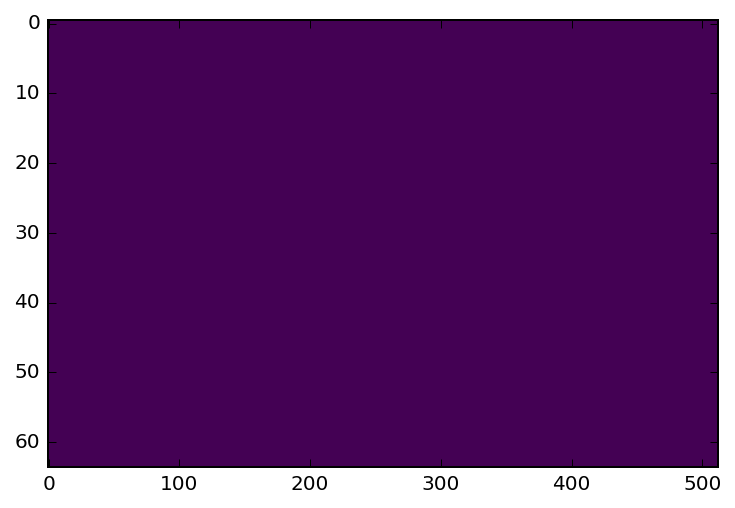

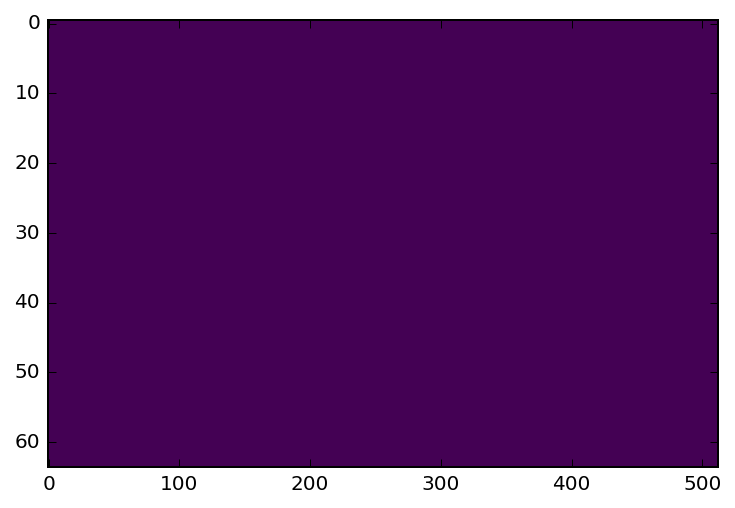

In [15]:
plt.imshow(F.get_weights())
plt.gca().set_aspect('auto')
plt.figure()
plt.imshow(G.get_weights())
plt.gca().set_aspect('auto')


In [18]:
Ff = astropy.io.fits.open(join(puppi1,f))
Gf = astropy.io.fits.open(join(puppi2,f))


In [26]:
print Gf[1].data

[ ('Fri Nov  8 15:09:17 2013', 'UNKNOWN                                                                         ', 'FluxDen ', 'AABBCRCI', 64, 4, 2048, 2048, 1.3342496249791094e-06, 1380.78125, 512, -1.5625, 0.0, 0.0, 0, 0, 0, 0, 0, 'UNSET                           ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 0, 'NONE                            ', 0)
 ('Mon Dec  2 11:18:52 2013', 'psredit -m -c rcvr:name=L-wide                                                  ', 'FluxDen ', 'AABBCRCI', 64, 4, 2048, 2048, 1.3342496249810353e-06, 1380.78125, 512, -1.5625, 0.0, 0.0, 0, 0, 0, 0, 0, 'UNSET                           ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 'NONE                            ', 0, 'NONE                            ', 0)]


In [23]:
Gf.info()

Filename: /psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56554_J0337+1715_0223_0001.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      64   ()              
1    HISTORY     BinTableHDU     71   2R x 28C     [24A, 80A, 8A, 8A, 1I, 1I, 1I, 1I, 1D, 1D, 1I, 1D, 1D, 1D, 1I, 1I, 1I, 1I, 1I, 32A, 32A, 32A, 32A, 32A, 32A, 1I, 32A, 1I]   
2    PSRPARAM    BinTableHDU     12   31R x 1C     [128A]   
3    POLYCO      BinTableHDU     38   2R x 13C     [24A, 16A, 1I, 1I, 1I, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 15D]   
4    SUBINT      BinTableHDU     87   64R x 20C    [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1E, 1E, 1D, 1D, 512E, 512E, 2048E, 2048E, 4194304I]   


In [3]:
for f in commonfiles:
    shutil.move(join(puppi2,f),join(puppi1,"duplicates",f))